In [ ]:

!pip install pandas matplotlib seaborn scikit-learn --quiet


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


In [ ]:
# Upload the CSV files
from google.colab import files
uploaded = files.upload()

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows of each dataset
print("Customers:\n", customers.head())
print("Products:\n", products.head())
print("Transactions:\n", transactions.head())


Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv
Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23        

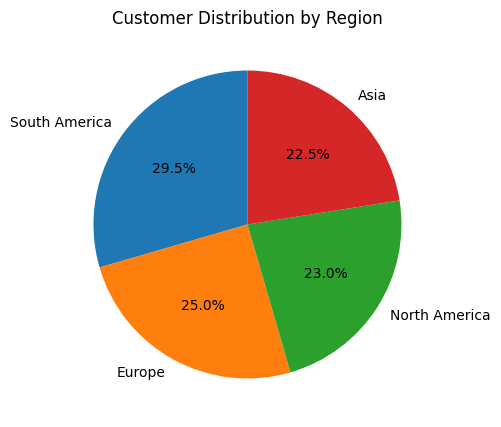

<ipython-input-4-f6145b53665e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


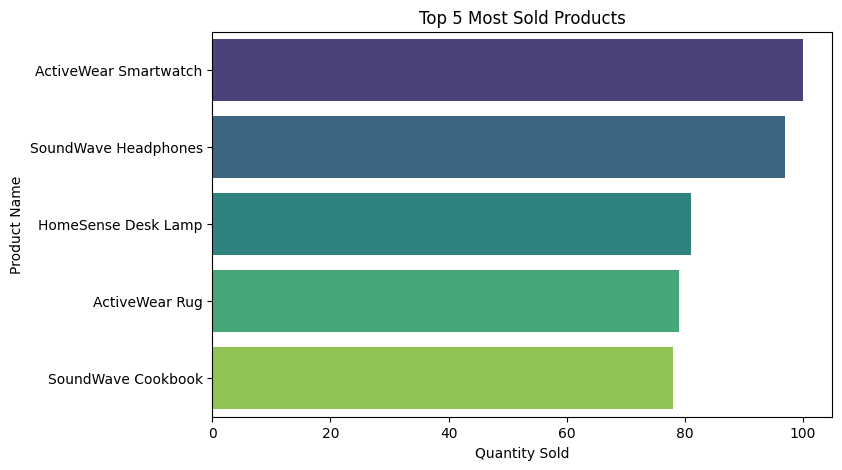

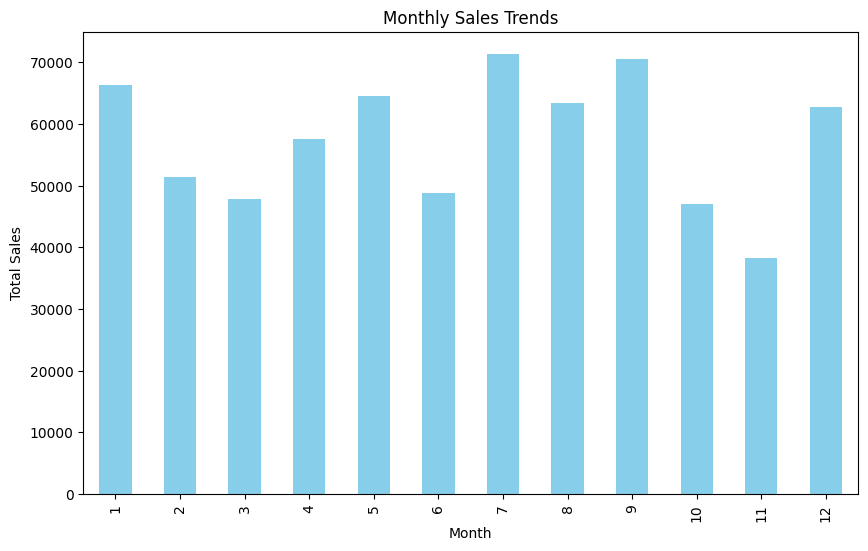

Top 5 High-Value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


<ipython-input-4-f6145b53665e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_categories.values, y=popular_categories.index, palette="coolwarm")


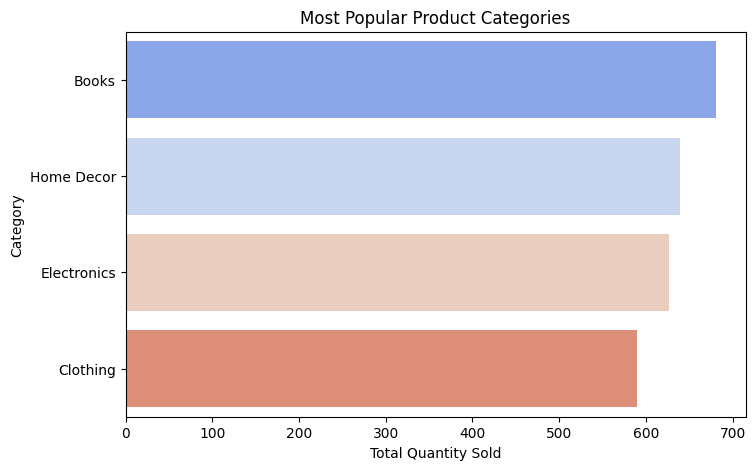

In [ ]:
# Merge datasets
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Insight 1: Customer distribution by region
region_counts = customers["Region"].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Distribution by Region")
plt.show()

# Insight 2: Top 5 most sold products
top_products = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 5 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# Insight 3: Monthly sales trends
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby("Month")["TotalValue"].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Insight 4: High-value customers
high_value_customers = data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("Top 5 High-Value Customers:\n", high_value_customers)

# Insight 5: Popular product categories
popular_categories = data.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=popular_categories.values, y=popular_categories.index, palette="coolwarm")
plt.title("Most Popular Product Categories")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Category")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Upload the datasets
from google.colab import files
uploaded = files.upload()

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Step 2: Merge the datasets
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Step 3: Prepare customer profiles
customer_profiles = data.groupby("CustomerID").agg({
    "TotalValue": "sum",    # Total spend by customer
    "Quantity": "sum"       # Total quantity purchased
}).reset_index()

# Step 4: Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(customer_profiles[["TotalValue", "Quantity"]])

# Step 5: Compute cosine similarity
similarity_matrix = cosine_similarity(features)

# Step 6: Generate Lookalike Recommendations
lookalikes = {}
for idx, customer_id in enumerate(customer_profiles["CustomerID"][:20]):  # First 20 customers
    sim_scores = list(enumerate(similarity_matrix[idx]))  # Get similarity scores for this customer
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:4]  # Top 3 (excluding itself)
    lookalikes[customer_id] = [
        (customer_profiles.iloc[i[0]]["CustomerID"], round(i[1], 2)) for i in sim_scores
    ]

# Step 7: Create and save Lookalike.csv
lookalike_df = pd.DataFrame({
    "CustomerID": list(lookalikes.keys()),
    "Lookalikes": [str(v) for v in lookalikes.values()]  # Convert lists to strings for CSV
})

# Save the CSV file
lookalike_df.to_csv("Lookalike.csv", index=False)
print("Lookalike.csv has been saved!")

# Download the CSV file
from google.colab import files
files.download("Lookalike.csv")


Saving Transactions.csv to Transactions (1).csv
Saving Products.csv to Products (1).csv
Saving Customers.csv to Customers (1).csv
Lookalike.csv has been saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimal Number of Clusters: 10, DB Index: 0.874354292939002


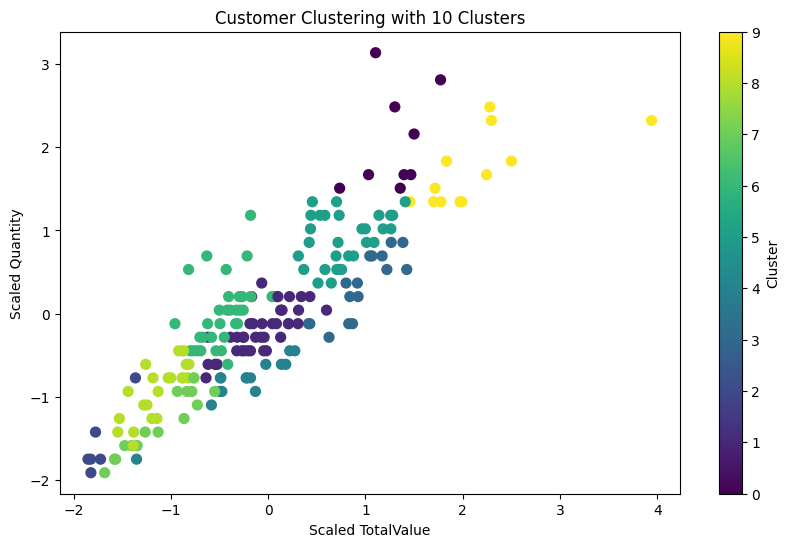

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Feature preparation for clustering
clustering_data = customer_profiles[["TotalValue", "Quantity", "Price"]]
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Determine optimal clusters using Davies-Bouldin Index
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    db_scores.append(davies_bouldin_score(clustering_data_scaled, kmeans.labels_))

# Optimal number of clusters
optimal_k = db_scores.index(min(db_scores)) + 2
print(f"Optimal Number of Clusters: {optimal_k}, DB Index: {min(db_scores)}")

# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)
customer_profiles["Cluster"] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f"Customer Clustering with {optimal_k} Clusters")
plt.xlabel("Scaled TotalValue")
plt.ylabel("Scaled Quantity")
plt.colorbar(label="Cluster")
plt.show()

# Save clustered customer profiles
customer_profiles.to_csv("Customer_Clusters.csv", index=False)
print("Customer_Clusters.csv has been saved.")

# Download the cluster results
files.download("Customer_Clusters.csv")
